In [34]:
import numpy as np
import MDAnalysis as mda
import MDAnalysis.analysis.hbonds
import matplotlib.pyplot as plt
import pandas as pd
import analyse

In [64]:
results_folder = '../4djhA/results/'
folder = '../4djhA/'
traj_file = results_folder + 'namd/step7.2_production.dcd'
print(results_folder+'step5_assembly.xplor_ext.psf')

../4djhA/results/step5_assembly.xplor_ext.psf


In [10]:
u =  mda.Universe(results_folder+'step5_assembly.xplor_ext.psf', traj_file)
ref = mda.Universe('../4djhA/4djh_inp.pdb')

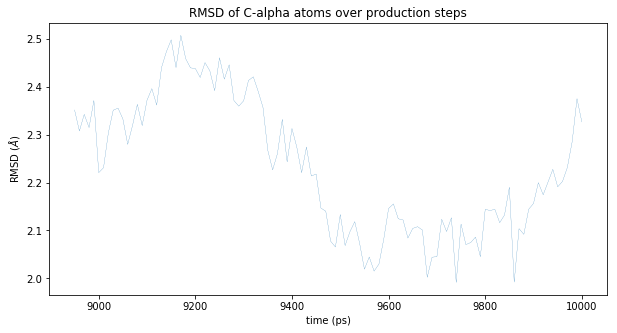

In [12]:
title = 'RMSD of C-alpha atoms over production steps'
R, r_fig = analyse.rmsd_traj(u, ref, title)

In [15]:
h = mda.analysis.hbonds.HydrogenBondAnalysis(u, selection1='protein',
                                             selection1_type='both',
                                             distance=3.0, angle=120.0)
h.run()

               time  donor_index  acceptor_index donor_resnm  donor_resid  \
0       8950.000027           28           82939         ALA            3   
1       8950.000027           71              26         VAL            6   
2       8950.000027           71              36         VAL            6   
3       8950.000027           87              36         ILE            7   
4       8950.000027          106              55         ILE            8   
5       8950.000027          125              69         THR            9   
6       8950.000027          131              69         THR            9   
7       8950.000027          139              85         ALA           10   
8       8950.000027          139             104         ALA           10   
9       8950.000027          149             104         VAL           11   
10      8950.000027          165             123         TYR           12   
11      8950.000027          186             137         SER           13   

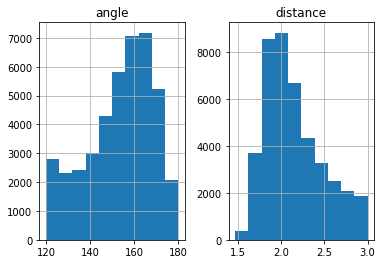

In [16]:
h.generate_table()
df = pd.DataFrame.from_records(h.table)
df.hist(column=["angle", "distance"])
print(df)

In [20]:
print(h.table['donor_index'])

[    28     71     71 ... 155595 157034 157275]


In [25]:
h_prot = mda.analysis.hbonds.HydrogenBondAnalysis(u, selection1='protein',
                                                  selection2='protein',
                                             selection1_type='both',
                                             distance=3.0)
h_prot.run()

               time  donor_index  acceptor_index donor_resnm  donor_resid  \
0       8950.000027           71              26         VAL            6   
1       8950.000027           71              36         VAL            6   
2       8950.000027           87              36         ILE            7   
3       8950.000027          106              55         ILE            8   
4       8950.000027          125              69         THR            9   
5       8950.000027          131              69         THR            9   
6       8950.000027          139              85         ALA           10   
7       8950.000027          139             104         ALA           10   
8       8950.000027          149             104         VAL           11   
9       8950.000027          165             123         TYR           12   
10      8950.000027          186             137         SER           13   
11      8950.000027          193             137         SER           13   

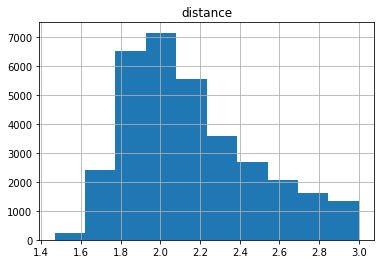

In [26]:
h_prot.generate_table()
df = pd.DataFrame.from_records(h_prot.table)
df.hist(column=["distance"])
print(df)

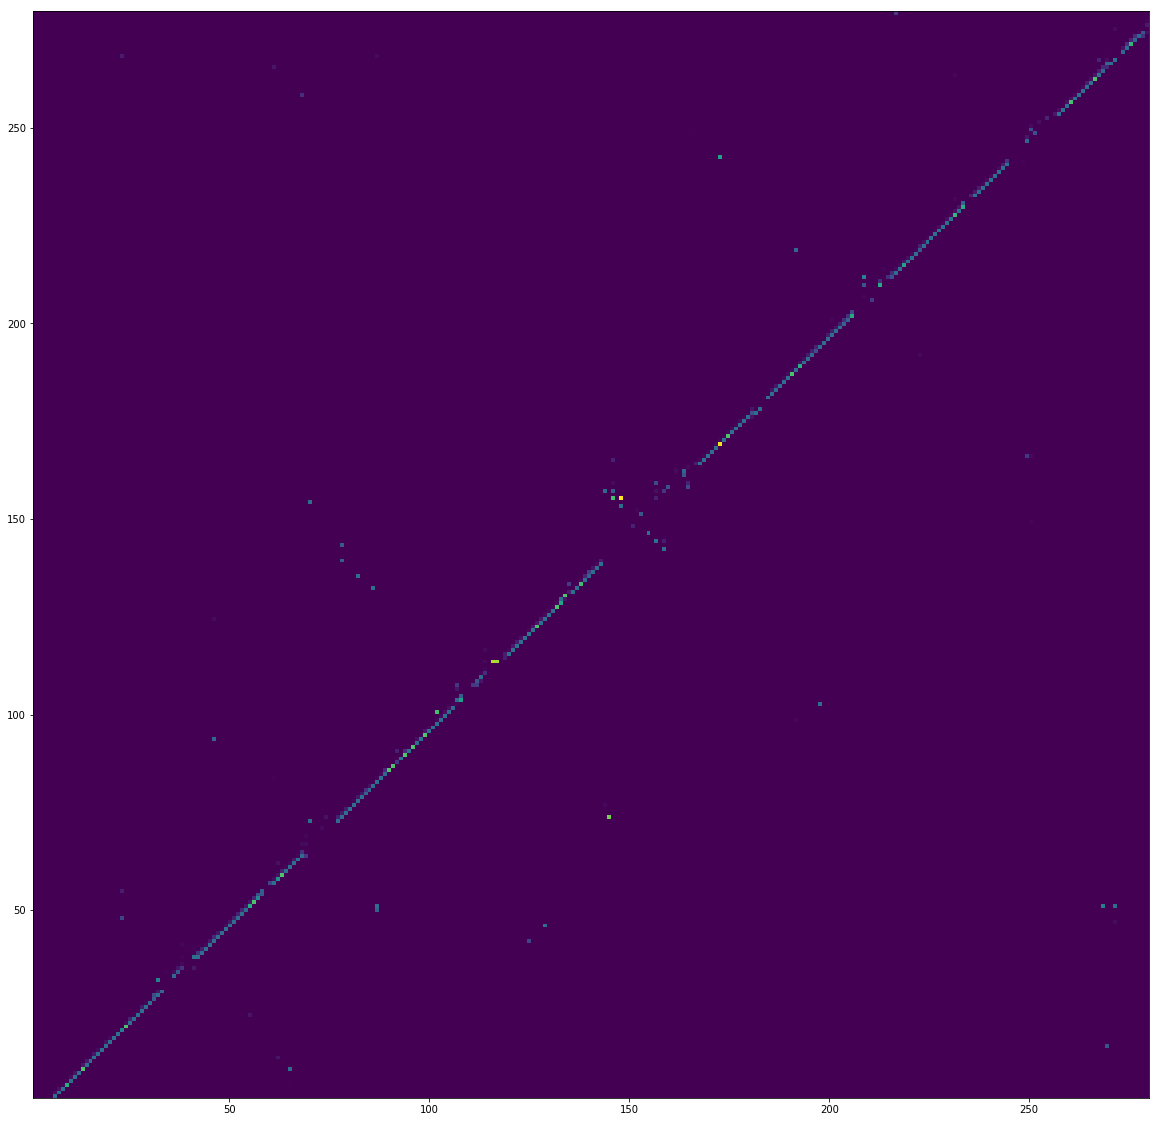

In [84]:
plt.subplots(figsize=(20,20))
bob = plt.hist2d(h_prot.table['donor_resid'], h_prot.table['acceptor_resid'], bins=280)

In [66]:
df.to_csv(folder+'hbonds.csv')

Text(0.5, 1.0, 'Formed hydrogen bonds over time')

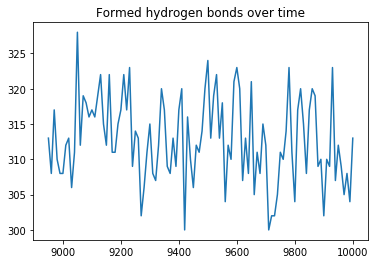

In [132]:
by_time = h_prot.count_by_time()
time = [i[0] for i in by_time]
N = [i[1] for i in by_time]
plt.plot(time, N)
plt.title('Formed hydrogen bonds over time')

In [134]:
by_type = h_prot.count_by_type()
by_t_df = pd.DataFrame(data=by_type)
by_t_df.columns = ['donor_index', 'acceptor_index', 'donor_resnm', 'donor_resid', 'donor_heavy_atom', 'donor_atom', 'acceptor_resnm', 'acceptor_resid', 'acceptor_atom', 'frequency']
print(by_t_df)

     donor_index  acceptor_index donor_resnm  donor_resid donor_heavy_atom  \
0             71              26         VAL            6                N   
1             71              36         VAL            6                N   
2             87              36         ILE            7                N   
3            106              55         ILE            8                N   
4            125              69         THR            9                N   
5            131              69         THR            9              OG1   
6            139              85         ALA           10                N   
7            139             104         ALA           10                N   
8            149             104         VAL           11                N   
9            165             123         TYR           12                N   
10           186             137         SER           13                N   
11           193             137         SER           13       

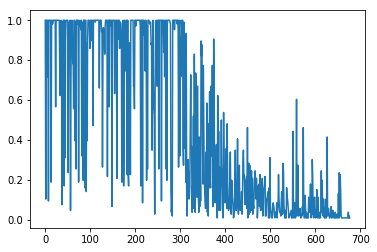

In [135]:
plt.plot(by_t_df['frequency'])

In [138]:
all1 = by_t_df.loc[by_t_df['frequency'] == 1]

In [141]:
print(all1)

     donor_index  acceptor_index donor_resnm  donor_resid donor_heavy_atom  \
0             71              26         VAL            6                N   
2             87              36         ILE            7                N   
4            125              69         THR            9                N   
6            139              85         ALA           10                N   
8            149             104         VAL           11                N   
9            165             123         TYR           12                N   
10           186             137         SER           13                N   
11           193             137         SER           13               OG   
14           213             163         VAL           15                N   
15           229             184         PHE           16                N   
18           281             227         GLY           19                N   
19           288             247         LEU           20       

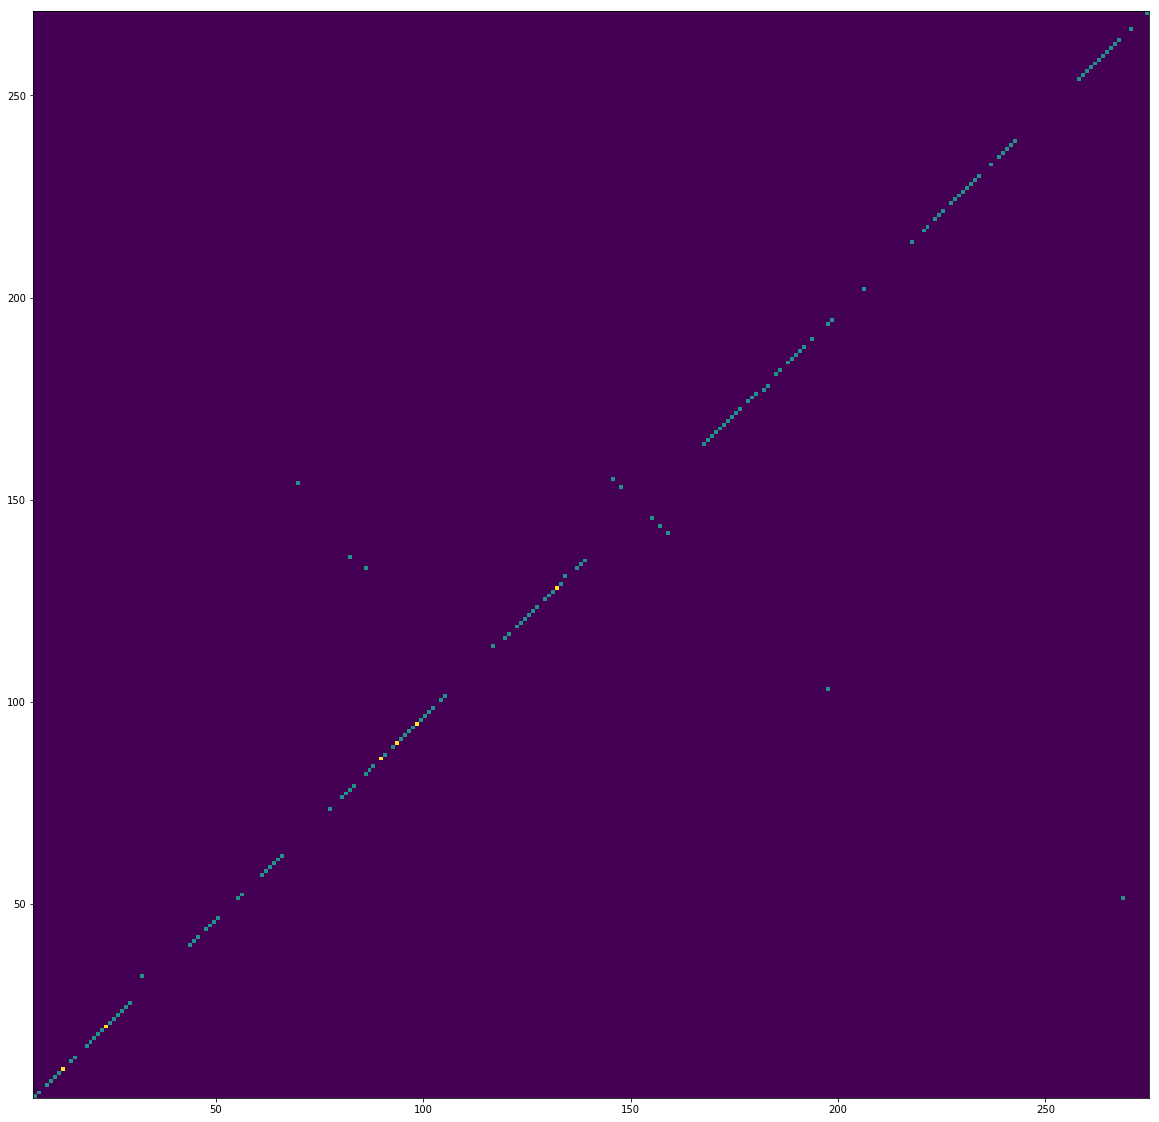

In [143]:
plt.subplots(figsize=(20,20))
bob = plt.hist2d(all1['donor_resid'], all1['acceptor_resid'], bins=280)

In [155]:
inter_hbond = by_t_df.loc[(by_t_df['frequency'] > 0.5) & (by_t_df['donor_resid'] != by_t_df['acceptor_resid'])]
print(inter_hbond)

     donor_index  acceptor_index donor_resnm  donor_resid donor_heavy_atom  \
0             71              26         VAL            6                N   
2             87              36         ILE            7                N   
3            106              55         ILE            8                N   
4            125              69         THR            9                N   
5            131              69         THR            9              OG1   
6            139              85         ALA           10                N   
8            149             104         VAL           11                N   
9            165             123         TYR           12                N   
10           186             137         SER           13                N   
11           193             137         SER           13               OG   
12           197             147         VAL           14                N   
14           213             163         VAL           15       

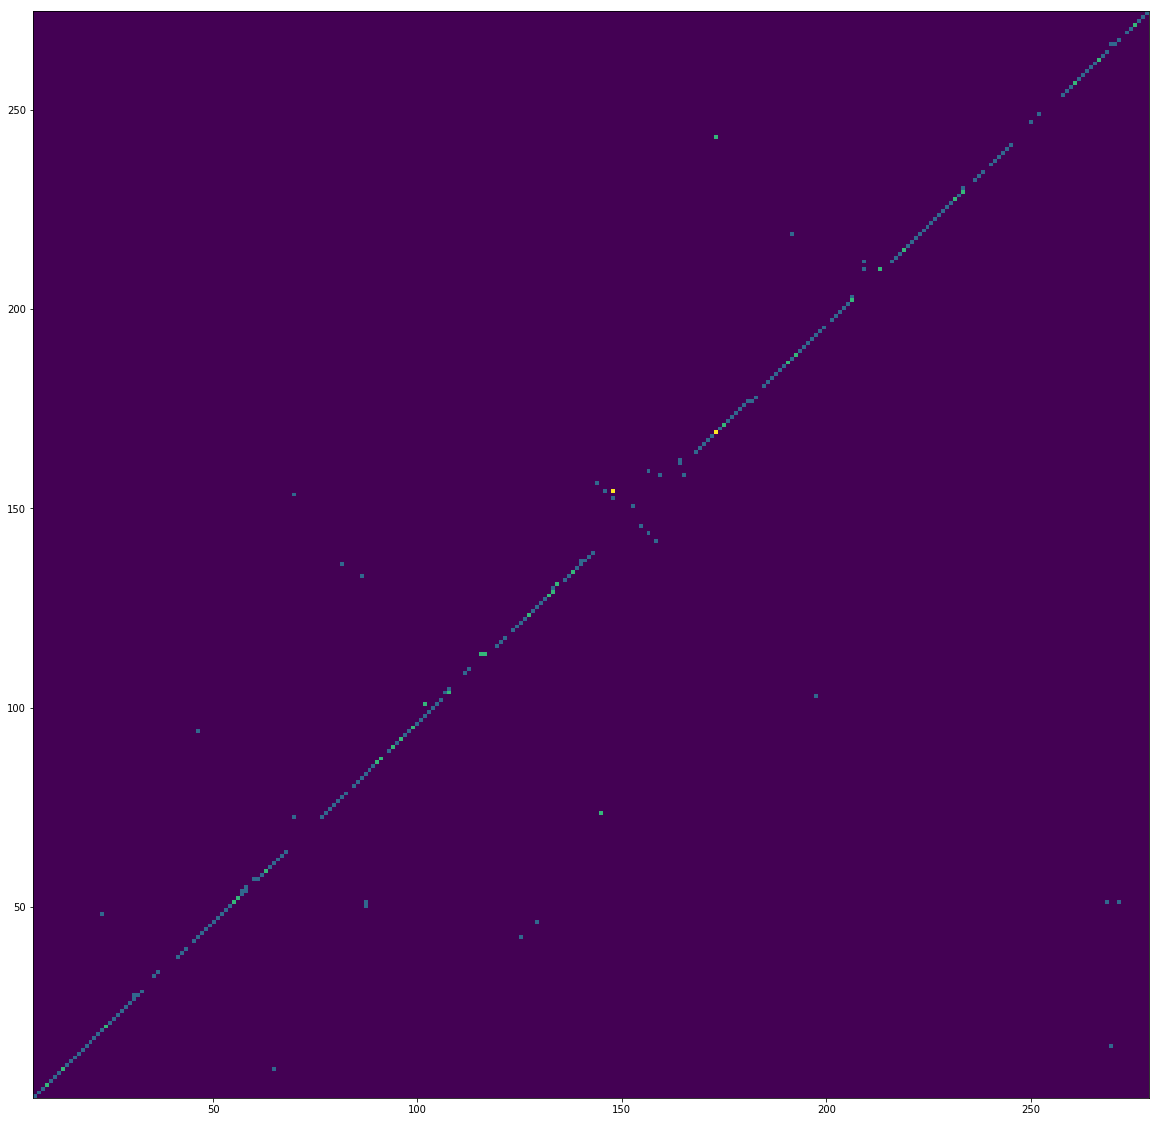

In [159]:
plt.subplots(figsize=(20,20))
bob = plt.hist2d(inter_hbond['donor_resid'], inter_hbond['acceptor_resid'], bins=280)